In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import plot_faceis as pltf
from sklearn import preprocessing

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

In [2]:
filename = 'facies_vectors.csv'
data = pd.read_csv(filename)

well0 = 'CHURCHMAN BIBLE'

training_data= data[data['Well Name'] != well0]

In [3]:
#data['Well Name'] = data['Well Name'].astype('category')
data['Well Name'].unique()

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

In [4]:
# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
data.loc[:,'FaciesLabels'] = data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


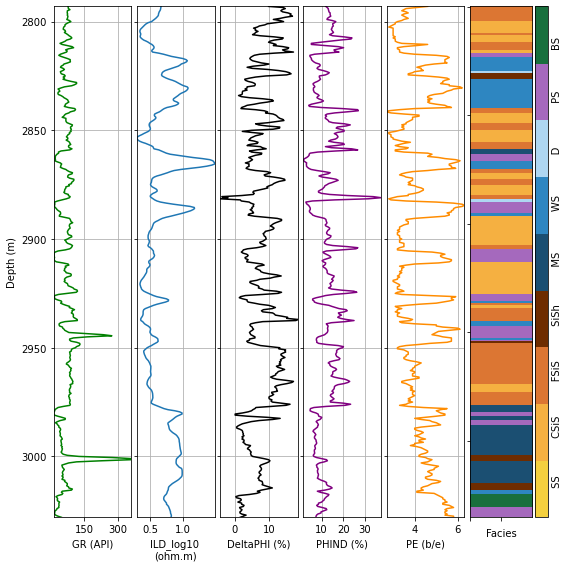

In [5]:
pltf.make_facies_log_plot(
    data[data['Well Name'] == 'SHRIMPLIN'],
    facies_colors)

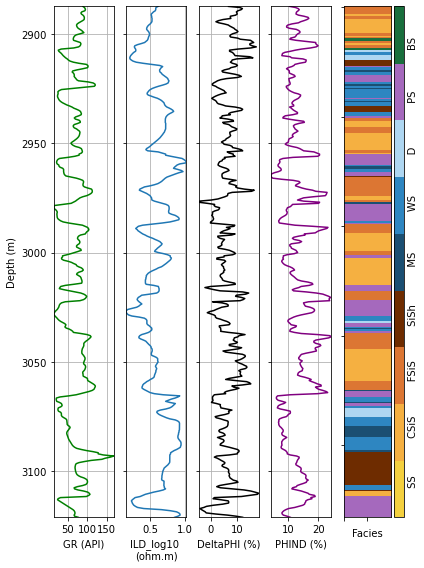

In [6]:
pltf.make_facies_log_plot_SPE(
    data[data['Well Name'] == 'ALEXANDER D'],
    facies_colors)

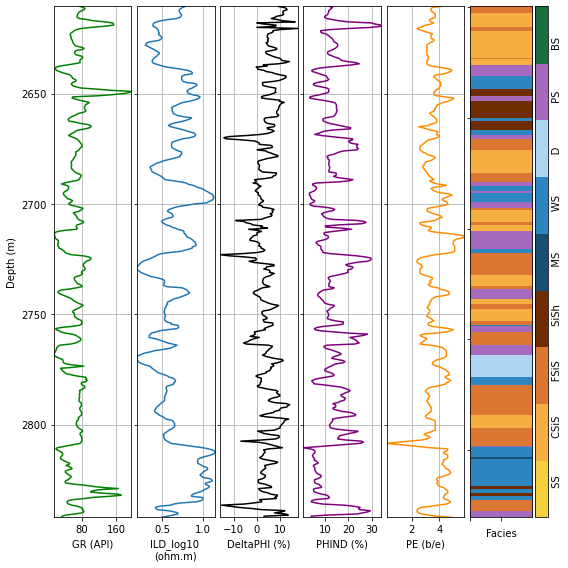

In [7]:
pltf.make_facies_log_plot(
    data[data['Well Name'] == 'LUKE G U'],
    facies_colors)

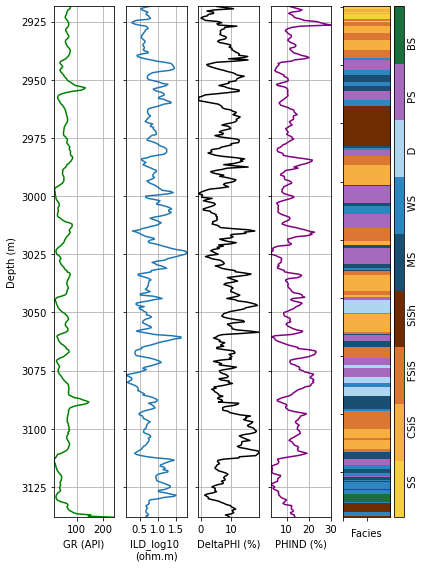

In [8]:
pltf.make_facies_log_plot_SPE(
    data[data['Well Name'] == 'KIMZEY A'],
    facies_colors)

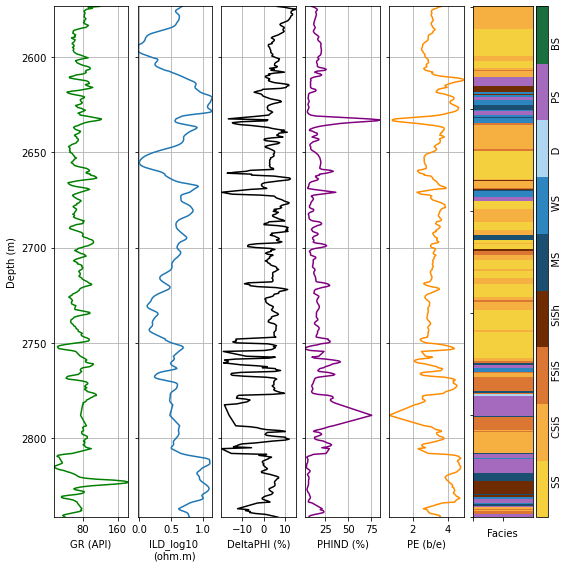

In [9]:
pltf.make_facies_log_plot(
    data[data['Well Name'] == 'CROSS H CATTLE'],
    facies_colors)

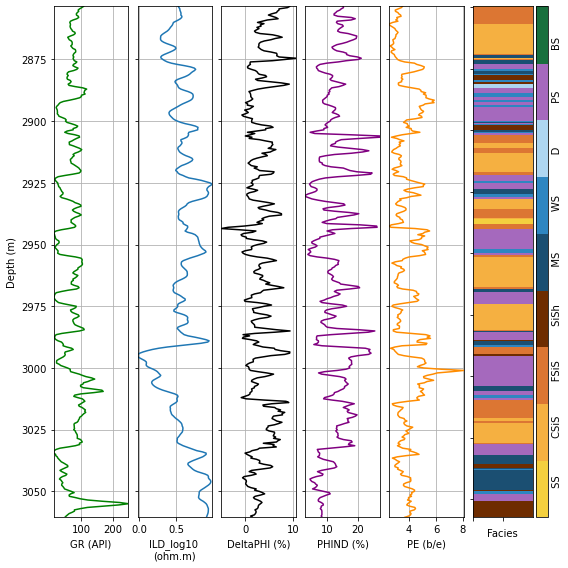

In [10]:
pltf.make_facies_log_plot(
    data[data['Well Name'] == 'NOLAN'],
    facies_colors)

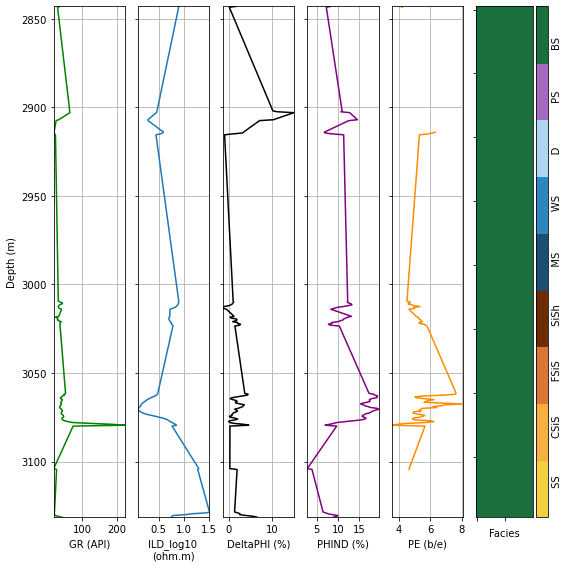

In [11]:
pltf.make_facies_log_plot(
    data[data['Well Name'] == 'Recruit F9'],
    facies_colors)

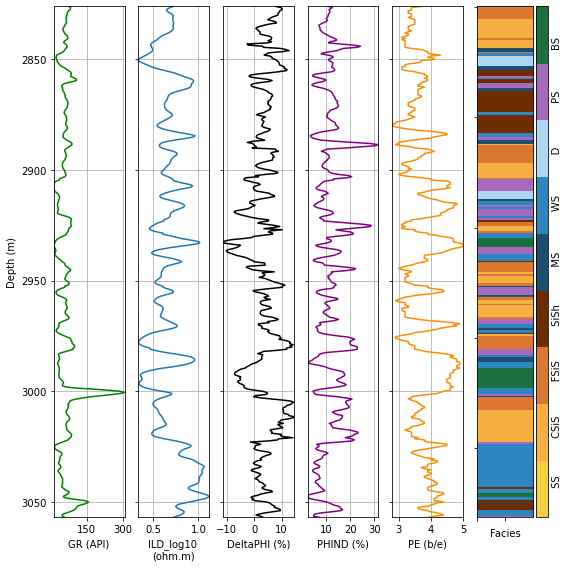

In [12]:
pltf.make_facies_log_plot(
    data[data['Well Name'] == 'NEWBY'],
    facies_colors)

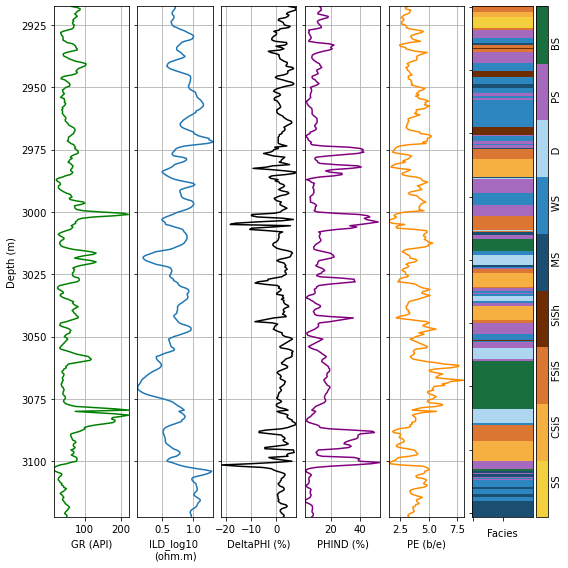

In [13]:
pltf.make_facies_log_plot(
    data[data['Well Name'] == 'CHURCHMAN BIBLE'],
    facies_colors)

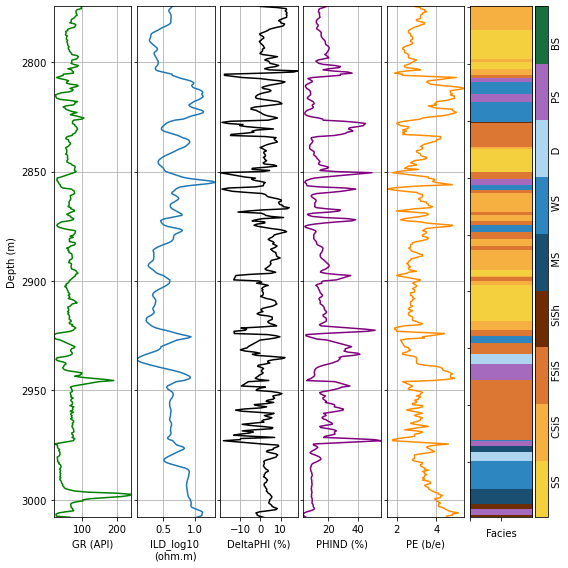

In [14]:
pltf.make_facies_log_plot(
    data[data['Well Name'] == 'SHANKLE'],
    facies_colors)

In addition to individual wells, we can look at how the various facies are represented by the entire training set. Let's plot a histogram of the number of training examples for each facies class.

SS      268
CSiS    940
FSiS    780
SiSh    271
MS      296
WS      582
D       141
PS      686
BS      185
Name: Facies, dtype: int64

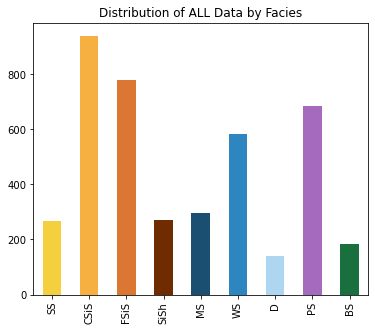

In [15]:
#THIS IS WITH THE BLIND WELL

#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels
plt.figure(figsize=(6,5))
facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of ALL Data by Facies')
facies_counts

C:\Users\felip\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':


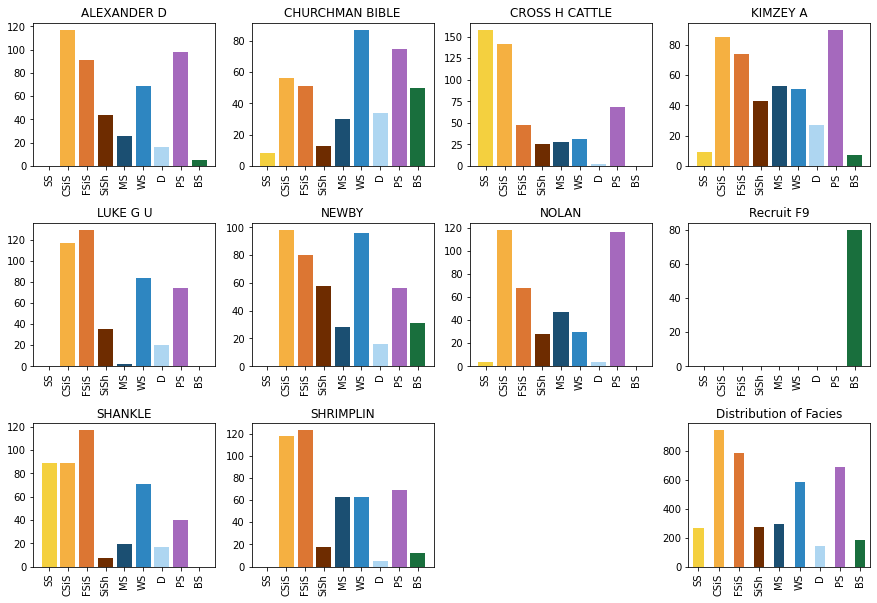

In [16]:
# Facies per well
mpl.rcParams['figure.figsize']=(15,10)
well = data['Well Name'].values
y = data['Facies'].values
facies_names = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']

for w_idx, w in enumerate(np.unique(well)):
    ax = plt.subplot(3, 4, w_idx+1)
    hist = np.histogram(y[well == w], bins=np.arange(len(facies_names)+1)+.5)
    plt.bar(np.arange(len(hist[0])), hist[0], color=facies_colors, align='center')
    ax.set_xticks(np.arange(len(hist[0])))
    ax.set_xticklabels(facies_names, Rotation = 90)
    ax.set_title(w)
    
facies_counts = data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels
ax=plt.subplot(3,4,12)
facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Facies')    

plt.subplots_adjust(hspace=0.4)

plt.savefig('figures/figure2.png',dpi=500, bbox_inches='tight')

C:\Users\felip\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()


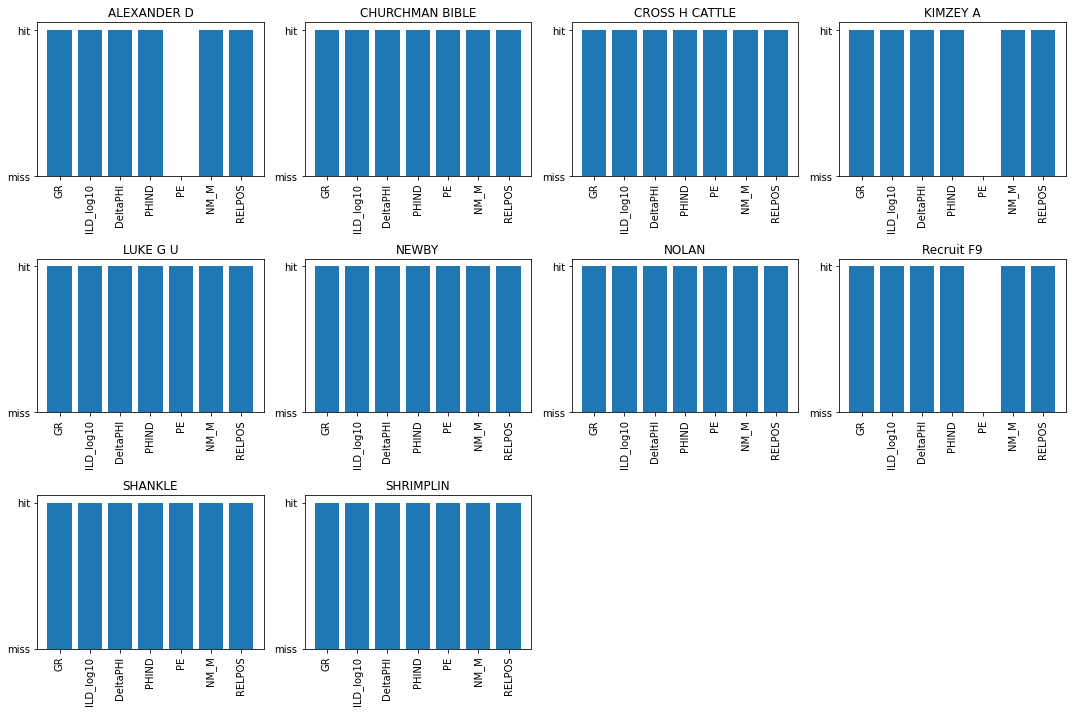

In [17]:
# Features per well

feature_names = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']
X = data[feature_names].values

for w_idx, w in enumerate(np.unique(well)):
    ax = plt.subplot(3, 4, w_idx+1)
    hist = np.logical_not(np.any(np.isnan(X[well == w, :]), axis=0))
    plt.bar(np.arange(len(hist)), hist, align='center')
    ax.set_xticks(np.arange(len(hist)))
    ax.set_xticklabels(feature_names, Rotation = 90)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['miss', 'hit'])
    ax.set_title(w)
    
plt.subplots_adjust(hspace=0.3)    
plt.tight_layout()

This shows the distribution of examples by facies for the 3232 training examples in the training set.  Dolomite (facies 7) has the fewest with 141 examples.  There are also only 185 bafflestone examples.  Depending on the performance of the classifier we are going to train, we may consider getting more examples of these facies.

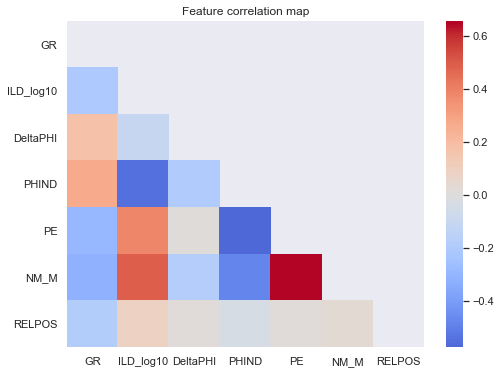

In [ ]:
corr = data.drop(['Facies','Depth'],axis=1).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

ax = plt.figure(figsize=(8,6))
ax = plt.axes()
sns.heatmap(corr, mask=mask,cmap='coolwarm', center=0, ax = ax)
ax.set_title('Feature correlation map')
plt.show()

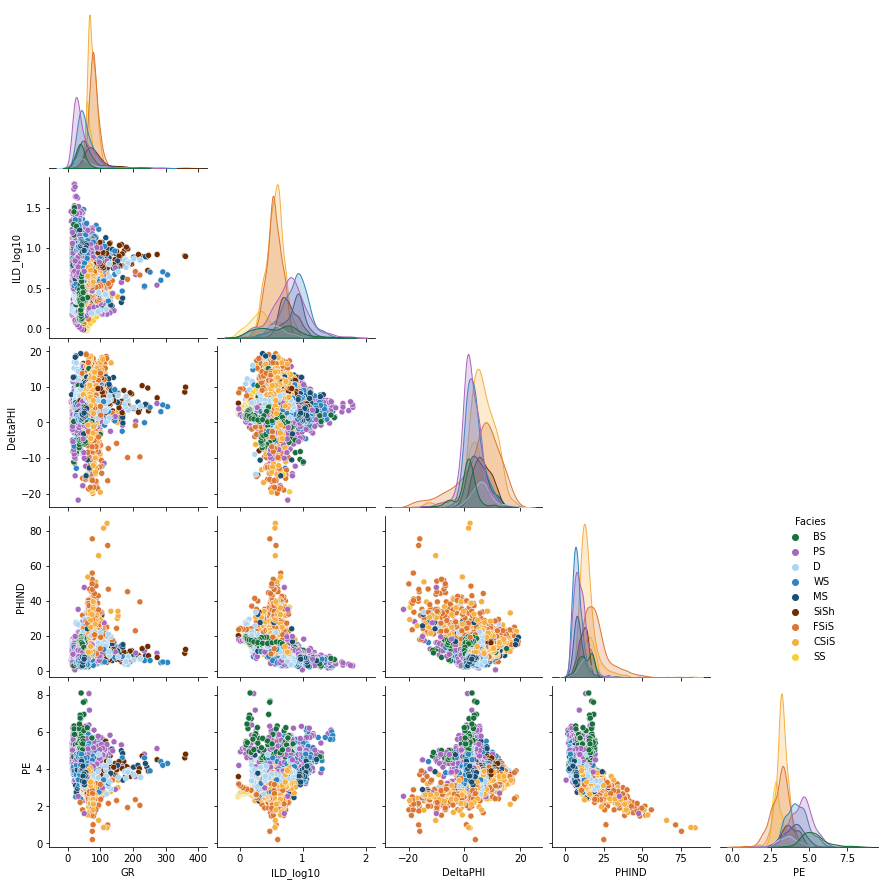

In [8]:
ax = sns.pairplot(data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)), corner=True)

ax.fig.get_children()[-1].set_bbox_to_anchor((0.87, 0.33))
ax.fig.get_children()[-1].set_title('Facies')

plt.savefig('figures/figure3.png',dpi=500, bbox_inches='tight')

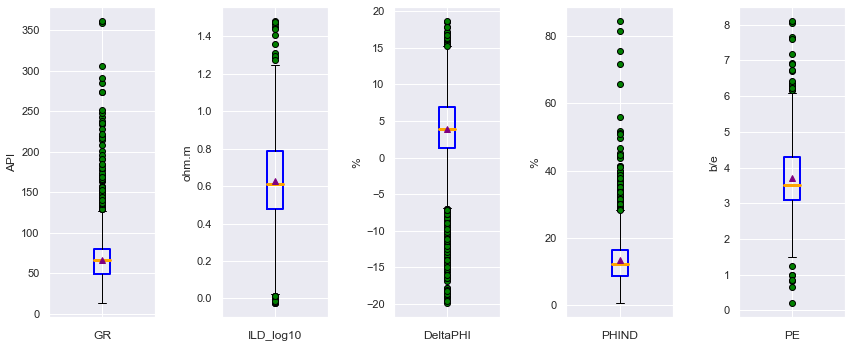

In [ ]:
# NANs are dropped - PE

feature_names = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']
X = training_data[feature_names].dropna().values
units = ['API', 'ohm.m', '%', '%', 'b/e']

flierprops = dict(marker='o', markerfacecolor='green', linestyle='none')
boxprops = dict(linewidth=2,c='blue')
medianprops = dict(linestyle='-', linewidth=3,color='orange')
meanprops=dict(markerfacecolor='purple',markeredgecolor='purple')

f, ax = plt.subplots(nrows=1, ncols=len(feature_names), figsize=(12,5))
for w_idx, w in enumerate(feature_names):
    ax[w_idx].boxplot(X[:,w_idx],boxprops=boxprops,flierprops=flierprops,medianprops=medianprops, 
            showmeans=True,meanprops=meanprops)
    ax[w_idx].set_xlabel(w)
    ax[w_idx].set_xticklabels('')
    ax[w_idx].set_ylabel(units[w_idx])

    
f.tight_layout(w_pad=2)